In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Store class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Explore the data
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

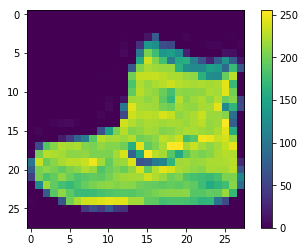

In [9]:
# Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

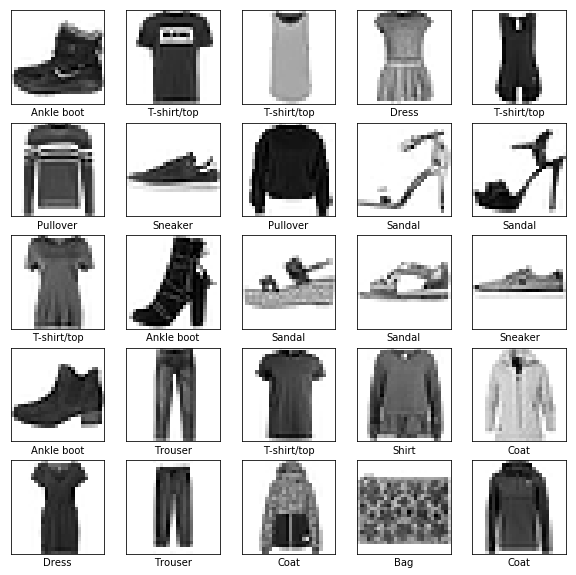

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# Build the model
# Set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.5012 - acc: 0.8249
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3733 - acc: 0.8659
Epoch 3/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3335 - acc: 0.8789
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3096 - acc: 0.8864
Epoch 5/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2912 - acc: 0.8922
Epoch 6/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2790 - acc: 0.8968
Epoch 7/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2673 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2572 - acc: 0.9050
Epoch 9/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2473 - acc: 0.9084
Epoch 10/10
60000/60000 [==============================] - 6s 101us/sample 

In [15]:
# Evaluate the accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

 - 0s - loss: 0.3376 - acc: 0.8849

Test accuracy: 0.8849


In [16]:
# Make the predictions
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([1.3053877e-08, 5.8985156e-10, 1.9006678e-09, 1.6624173e-10,
       3.5639971e-09, 1.9890717e-03, 3.1959564e-07, 5.0523030e-03,
       2.3856845e-07, 9.9295807e-01], dtype=float32)

In [19]:
# The label with the highest confidence value
np.argmax(predictions[0])

9

In [20]:
# Model is confident 9 is an ankle boot, examine the test label
test_labels[0]

9

In [22]:
# Graph the look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

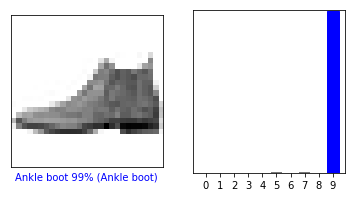

In [23]:
# Look at the 0th image, predictions, and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

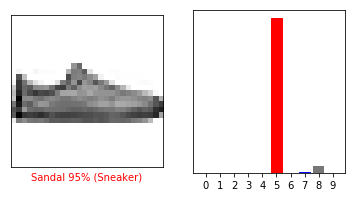

In [24]:
# look at another image, prediction, and prediction array
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

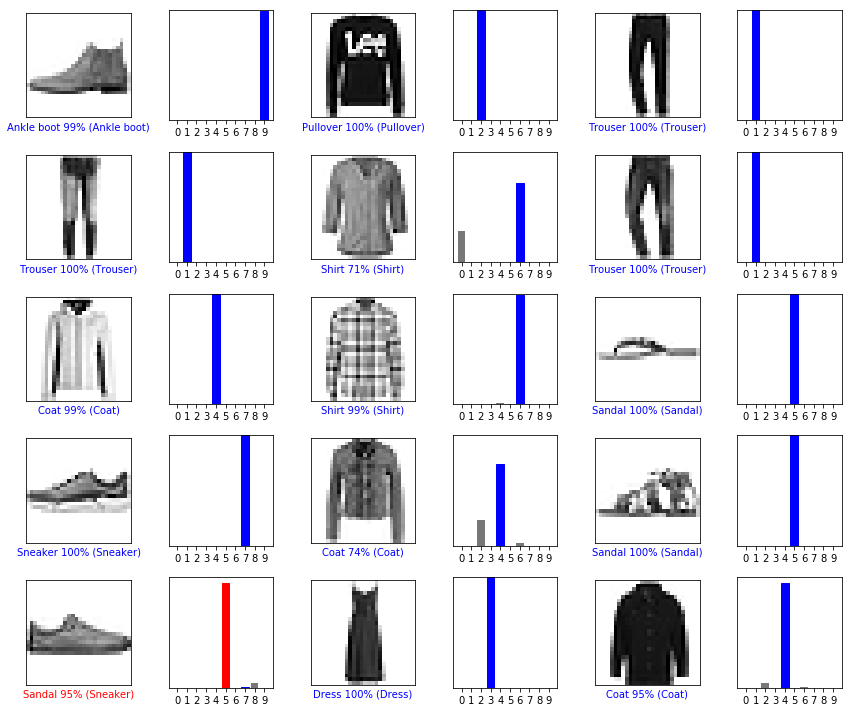

In [25]:
# Plot several images and their predictions
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [26]:
# Grab an image from the test dataset
img = test_images[1]
print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
# Predict the correct label for this image
predictions_single = model.predict(img)

print(predictions_single)

[[7.2870534e-05 2.0114090e-16 9.9775440e-01 9.0366020e-11 1.1324728e-03
  1.1995890e-11 1.0402228e-03 7.4269177e-14 2.3975872e-11 1.4192367e-15]]


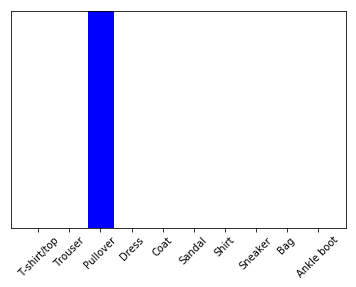

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
# Grab the predictions for our(only) image in the batch
np.argmax(predictions_single[0])

2